#### Paquetes necesarios

In [1]:
import cv2  
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pytesseract
from pytesseract import Output 
import re

#### Método para corregir formato de la matrícula (matrícula española)

In [2]:
def plate_validation(plate):
    # Definir el patrón de la matrícula "0000 AAA"
    plate_pattern = re.compile(r'^\d{4}\s[A-Z]{3}$')

    if plate_pattern.match(plate):
        # La matrícula cumple con el formato
        return plate
    else:
        # La matrícula no cumple con el formato, intentar corregirla
        plate_refactored = re.sub(r'^\s*.*?(\d{4}\s[A-Z]{3}).*$', r'\1', plate)
        return plate_refactored


[+] MATRÍCULA DETECTADA: 3488 LPZ



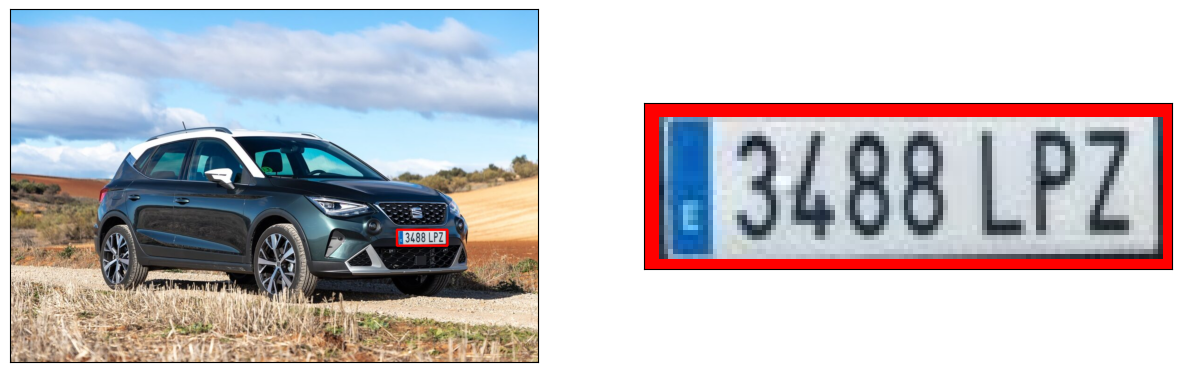

In [3]:
# Cargamos nuestro modelo entrenado
model_plate = YOLO('Models/plates_model.pt')

# Guardamos la ruta absoluta de tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

def plate_detector(image, apply_ocr=True):
    # Guardamos imagen en variable 
    car = cv2.imread(image)

    # Detectar matrículas
    results_plates = model_plate(car, verbose=False)

    # Para cada detección de matrícula
    for r_plate in results_plates:
        boxes_plates = r_plate.boxes

        for box_plate in boxes_plates:
            # Coordenadas del cuadro que envuelve la matrícula
            x1_plate, y1_plate, x2_plate, y2_plate = box_plate.xyxy[0]

            # Recortamos la imagen original para quedarnos solo con la matrícula
            plate_region = car[int(y1_plate):int(y2_plate), int(x1_plate):int(x2_plate)]

            # Dibujamos recuadro alrededor de la matrícula
            cv2.rectangle(car, (int(x1_plate), int(y1_plate)), (int(x2_plate), int(y2_plate)), (0, 0, 255), 3)

            if apply_ocr:
                # Aplicamos OCR a la matrícula
                text = pytesseract.image_to_string(plate_region, config='--psm 8', output_type=Output.STRING)

                # Corregimos el formato de la matrícula detectada con pytesseract
                text = plate_validation(text)

                print("\n[+] MATRÍCULA DETECTADA:", text)

            # Convertimos imagen del coche y de la matrícula a RGB
            car_rgb = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
            plate_region_rgb = cv2.cvtColor(plate_region, cv2.COLOR_BGR2RGB)

            fig = plt.figure(figsize=[15,15])
            ax1 = fig.add_subplot(121)
            ax1.imshow(car_rgb, cmap="gray")
            ax1.set(xticks=[], yticks=[])
            ax2 = fig.add_subplot(122)
            ax2.imshow(plate_region_rgb, cmap="gray")
            ax2.set(xticks=[], yticks=[])
            plt.show()

# Llamamos a la función
plate_detector("Images/coche6.jpg")

#### Test para probar que se detectan bien las matrículas

----------------------------------------------------- COCHE 1 -----------------------------------------------------


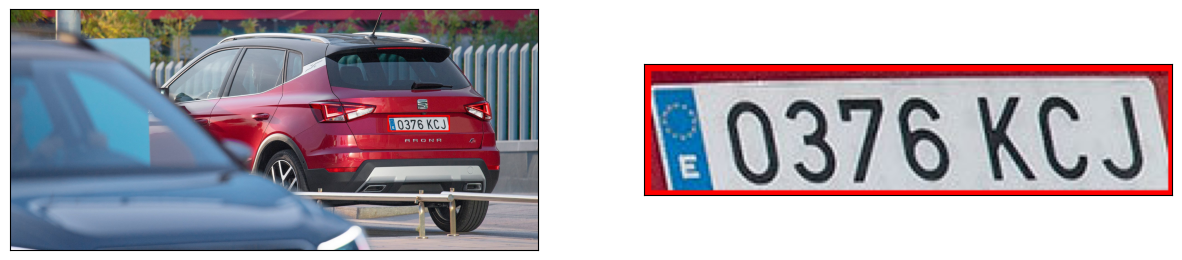

----------------------------------------------------- COCHE 2 -----------------------------------------------------


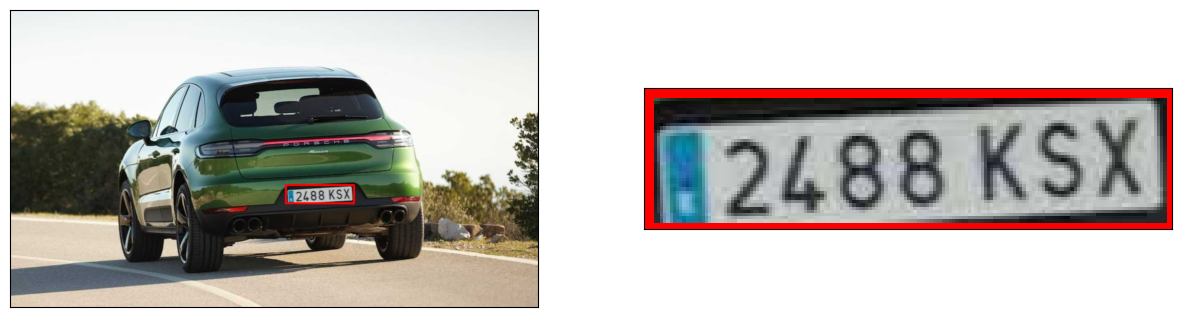

In [4]:
print("----------------------------------------------------- COCHE 1 -----------------------------------------------------")
plate_detector("Images/coche7.jpg", apply_ocr=False)

print("----------------------------------------------------- COCHE 2 -----------------------------------------------------")
plate_detector("Images/coche8.jpg", apply_ocr=False)